<a href="https://colab.research.google.com/github/naidk/NN-Assignment2/blob/main/HomeAssignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1: Convolution with Stride and Padding

In [1]:
import tensorflow as tf
import numpy as np

# 5x5 Input
input_matrix = tf.constant([
    [1, 2, 3, 4, 5],
    [6, 7, 8, 9, 10],
    [11,12,13,14,15],
    [16,17,18,19,20],
    [21,22,23,24,25]
], dtype=tf.float32)
input_matrix = tf.reshape(input_matrix, [1, 5, 5, 1])

# 3x3 Kernel
kernel = tf.constant([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
], dtype=tf.float32)
kernel = tf.reshape(kernel, [3, 3, 1, 1])

def apply_conv(stride, padding):
    return tf.nn.conv2d(input_matrix, kernel, strides=[1, stride, stride, 1], padding=padding)

# Convolution outputs
for label, stride, pad in [
    ("Stride=1, Padding=VALID", 1, 'VALID'),
    ("Stride=1, Padding=SAME", 1, 'SAME'),
    ("Stride=2, Padding=VALID", 2, 'VALID'),
    ("Stride=2, Padding=SAME", 2, 'SAME')
]:
    result = apply_conv(stride, pad)
    print(f"\n{label}:\n{tf.squeeze(result).numpy()}")



Stride=1, Padding=VALID:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

Stride=1, Padding=SAME:
[[  4.   3.   2.   1.  -6.]
 [ -5.   0.   0.   0. -11.]
 [-10.   0.   0.   0. -16.]
 [-15.   0.   0.   0. -21.]
 [-46. -27. -28. -29. -56.]]

Stride=2, Padding=VALID:
[[0. 0.]
 [0. 0.]]

Stride=2, Padding=SAME:
[[  4.   2.  -6.]
 [-10.   0. -16.]
 [-46. -28. -56.]]


Question 2 Task 1: Sobel Edge Detection

In [3]:
from google.colab import files
uploaded = files.upload()


Saving dog.jpeg to dog.jpeg


In [4]:
import os
print("Current directory files:")
print(os.listdir())  # You should see 'dog.jpeg' in the list


Current directory files:
['.config', 'dog.jpeg', 'sample_data']


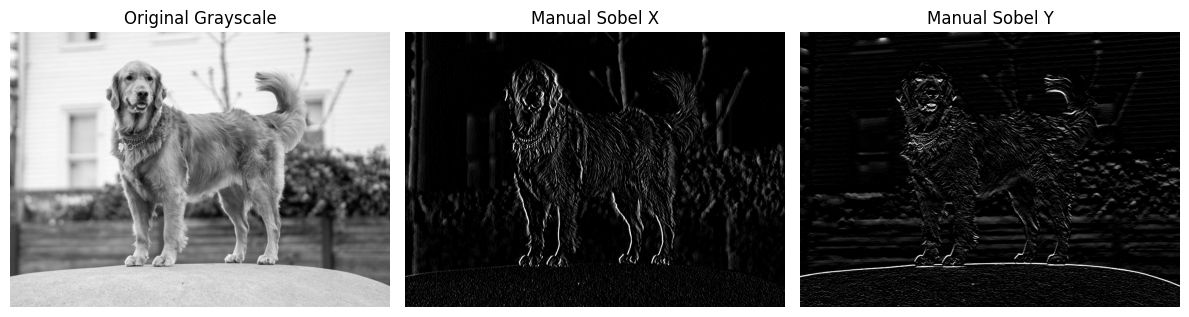

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load and convert to grayscale
image = cv2.imread('dog.jpeg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 2: Define custom Sobel kernels
sobel_x_kernel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float32)

sobel_y_kernel = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
], dtype=np.float32)

# Step 3: Apply custom filters using filter2D
sobel_x = cv2.filter2D(gray, -1, sobel_x_kernel)
sobel_y = cv2.filter2D(gray, -1, sobel_y_kernel)

# Step 4: Display results
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Original Grayscale")
plt.imshow(gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Manual Sobel X")
plt.imshow(sobel_x, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Manual Sobel Y")
plt.imshow(sobel_y, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


Task 2: Max Pooling & Average Pooling with TensorFlow

In [7]:
import tensorflow as tf
import numpy as np

# ✅ Step 1: Create a random 4x4 input matrix
np.random.seed(42)  # For reproducibility
input_array = np.random.randint(1, 10, size=(4, 4))
input_tensor = tf.constant(input_array, dtype=tf.float32)
input_tensor = tf.reshape(input_tensor, [1, 4, 4, 1])  # Shape: [batch, height, width, channels]

# ✅ Step 2: Apply 2x2 Max Pooling
max_pooled = tf.nn.max_pool2d(input_tensor, ksize=2, strides=2, padding='VALID')

# ✅ Step 3: Apply 2x2 Average Pooling
avg_pooled = tf.nn.avg_pool2d(input_tensor, ksize=2, strides=2, padding='VALID')

# ✅ Step 4: Print the outputs
print("🟩 Original 4x4 Matrix:\n", tf.squeeze(input_tensor).numpy())
print("\n🔷 Max Pooled Matrix (2x2):\n", tf.squeeze(max_pooled).numpy())
print("\n🔶 Average Pooled Matrix (2x2):\n", tf.squeeze(avg_pooled).numpy())


🟩 Original 4x4 Matrix:
 [[7. 4. 8. 5.]
 [7. 3. 7. 8.]
 [5. 4. 8. 8.]
 [3. 6. 5. 2.]]

🔷 Max Pooled Matrix (2x2):
 [[7. 8.]
 [6. 8.]]

🔶 Average Pooled Matrix (2x2):
 [[5.25 7.  ]
 [4.5  5.75]]


Q3: Data Preprocessing - Standardization vs. Normalization

✅ Min-Max Normalized data (first 5 rows):
 [[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]]

✅ Z-score Standardized data (first 5 rows):
 [[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


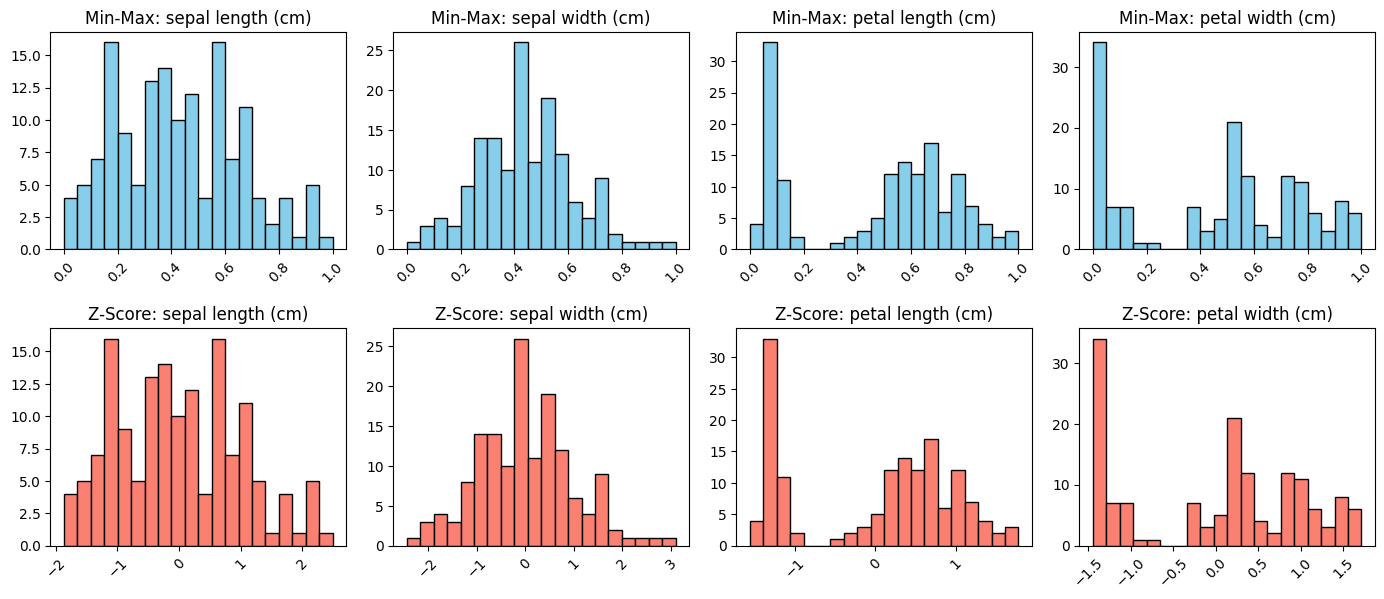

🔹 Accuracy on Original Data: 1.0000
🔹 Accuracy on Min-Max Normalized Data: 0.9111
🔹 Accuracy on Z-Score Standardized Data: 1.0000


In [9]:
# ✅ Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# ✅ 1. Load the Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# ✅ 2. Apply Min-Max Normalization
minmax_scaler = MinMaxScaler()
X_minmax = minmax_scaler.fit_transform(X)
print("✅ Min-Max Normalized data (first 5 rows):\n", X_minmax[:5])

# ✅ 3. Apply Z-score Standardization
zscore_scaler = StandardScaler()
X_zscore = zscore_scaler.fit_transform(X)
print("\n✅ Z-score Standardized data (first 5 rows):\n", X_zscore[:5])

# ✅ 4. Plot histograms for each feature separately
plt.figure(figsize=(14, 6))

for i in range(X.shape[1]):
    # Min-Max Normalized
    plt.subplot(2, 4, i + 1)
    plt.hist(X_minmax[:, i], bins=20, color='skyblue', edgecolor='black')
    plt.title(f"Min-Max: {feature_names[i]}")
    plt.xticks(rotation=45)

    # Z-Score Standardized
    plt.subplot(2, 4, i + 5)
    plt.hist(X_zscore[:, i], bins=20, color='salmon', edgecolor='black')
    plt.title(f"Z-Score: {feature_names[i]}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# ✅ 5. Train Logistic Regression & Compare Accuracy
def train_and_test(X_data, label, y):
    X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.3, random_state=42)
    model = LogisticRegression(max_iter=200)
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    print(f"🔹 Accuracy on {label}: {accuracy:.4f}")
    return accuracy

# Run and compare models
acc_original = train_and_test(X, "Original Data", y)
acc_minmax = train_and_test(X_minmax, "Min-Max Normalized Data", y)
acc_zscore = train_and_test(X_zscore, "Z-Score Standardized Data", y)


In deep learning, standardization is usually more effective than normalization because it centers and scales data, leading to faster convergence and better training stability. Normalization is still preferred for specific models like CNNs on image data, but standardization works well for most feedforward and recurrent neural networks.